In [1]:
import numpy as np
import matplotlib.pyplot as plt

X1 = np.random.multivariate_normal([2, 3], [[5, 0], [0,10]], (1000))
X2 = np.random.multivariate_normal([10, 10], [[5, 0], [0,10]], (1000))

plt.plot(X1[:,0], X1[:,1], '.')
plt.plot(X2[:,0], X2[:,1], '.')
plt.show()

<Figure size 640x480 with 1 Axes>

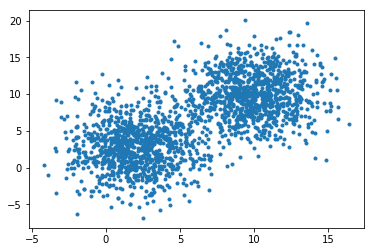

In [2]:
X = np.vstack((X1,X2))
plt.plot(X[:,0], X[:,1], '.')
plt.show()

In [3]:
def Kmeans(data, nclusters, iterations):
    
    Clusters = np.random.rand(nclusters, data.shape[1])
    assign = np.zeros(shape= (data.shape[0],))
    Jprev = 0
    
    for m in range(iterations):
        for i in range(data.shape[0]):
            distances = np.linalg.norm(Clusters - data[i,:], axis = 1)
            assign[i] = np.argmin(distances)

        for j in range(nclusters):
            ind = assign == j
            Clusters[j, :] = np.mean(data[ind, :], axis = 0)
        
        J = 0
        for j in range(nclusters):
            ind = assign == j
            distances = np.linalg.norm(Clusters[j, :] - data[ind,:], axis = 1)
            J += np.sum(distances)
        
        if (abs(J - Jprev) < 0.01):
            return assign, Clusters
        
        Jprev = J
            
    return assign, Clusters

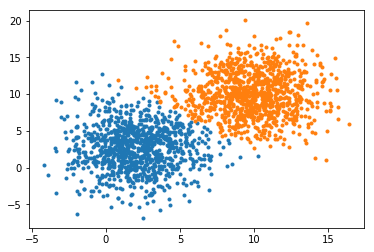

In [4]:
nclusters= 2
labels, Clusters = Kmeans(X, nclusters, 1000)

for j in range(nclusters):
    ind = labels == j
    plt.plot(X[ind,0], X[ind,1], '.')
    
plt.show()

In [5]:
a = np.array([2, 4, 6])
np.where(np.array([True, False]))[0]

array([0], dtype=int64)

In [6]:
class DBSCAN:
    def __init__(self, data, eps, minPts):
        self.data = data
        self.eps = eps
        self.minPts = minPts
        self.assign = np.zeros(shape= (data.shape[0],))
        self.nclusters = 0
        
    def run(self):
        allPoints = np.arange(self.data.shape[0])
        clusteredPoints = np.array([])
        alreadyChecked = np.array([])
        
        while (len(clusteredPoints) != len(allPoints)):
            noClusteredPoints = np.setdiff1d(allPoints, clusteredPoints)
            
            index = np.random.choice(noClusteredPoints)
            
            alreadyChecked = np.append(alreadyChecked, index)

            clusterIndices = np.array([index])
            clusterIndices, alreadyChecked = self.CheckNeighbors(index, clusterIndices, alreadyChecked)
            
            if (len(clusterIndices) >= self.minPts): #Nuclear Points
                self.assign[clusterIndices] = self.nclusters
                self.nclusters = self.nclusters + 1
            else:
                self.assign[index] = -1 #Outlier, Noisy Point
                
            
            clusteredPoints = np.append(clusteredPoints, clusterIndices)
        
        
    def CheckNeighbors(self, index, clusterIndices, alreadyChecked):
        alreadyChecked = np.append(alreadyChecked, index)
        
        point = self.data[index]
        distances = np.linalg.norm(point - self.data, axis = 1)
        neighborPoints = distances < self.eps
        count = np.sum(neighborPoints) - 1

        isNuclear = count >= self.minPts
        
        if isNuclear:
            neighborPointsIndices = np.where(neighborPoints)[0]
            neighborPointsIndices = np.setdiff1d(neighborPointsIndices, index)
            clusterIndices = np.unique(np.append(clusterIndices, neighborPointsIndices))
            for j in neighborPointsIndices:
                if not (j in alreadyChecked):
                    clusterIndices, alreadyChecked = self.CheckNeighbors(j, clusterIndices, alreadyChecked)

        return clusterIndices, alreadyChecked

In [7]:
dbscan = DBSCAN(X, 0.5, 2)
dbscan.run()

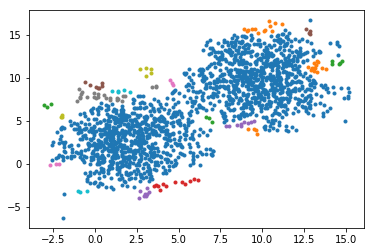

In [8]:
for j in range(dbscan.nclusters):
    ind = dbscan.assign == j
    plt.plot(X[ind,0], X[ind,1], '.')
    
plt.show()

# An example of image color segmentation.

[[  0   0 154 147 151]
 [  1   0 109 103 124]
 [  2   0  63  58 102]
 ...
 [509 511   0   0   0]
 [510 511   1   1   1]
 [511 511   0   0   0]]


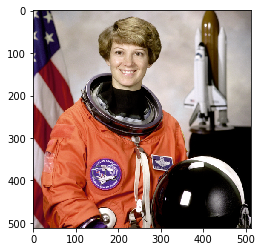

In [16]:
from skimage import data
image = data.astronaut()
plt.imshow(image);

x = np.arange(0, image.shape[0])
y = np.arange(0, image.shape[1])

xv, yv = np.meshgrid(x, y)
xv = np.reshape(xv,(image.shape[0]*image.shape[1],1))
yv = np.reshape(yv,(image.shape[0]*image.shape[1],1))
data = np.reshape(image,(image.shape[0]*image.shape[1],image.shape[2]))
data = np.concatenate((xv,yv,data), axis=1)
print(data)

In [70]:
nclusters=15;

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=nclusters, random_state=0).fit(data)
results = kmeans.labels_

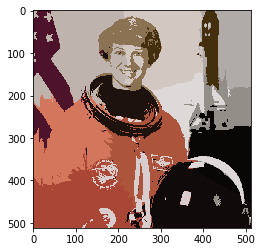

In [71]:
image_segmented = data[:,2:].copy()

result_image = image.copy()
for result in np.unique(results):
    ind = result == results
    image_segmented[ind, :] = np.mean(image_segmented[ind,:], axis = 0)
    
plt.imshow(np.reshape(image_segmented,(image.shape[0], image.shape[1], image.shape[2])))

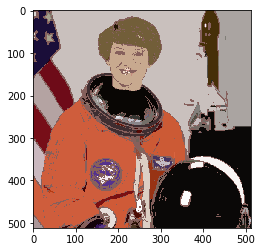

In [72]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=10, min_samples=15).fit(data)

results = clustering.labels_
image_segmented = data[:,2:].copy()

result_image = image.copy()
for result in np.unique(results):
    ind = result == results
    image_segmented[ind, :] = np.mean(image_segmented[ind,:], axis = 0)
    
plt.imshow(np.reshape(image_segmented,(image.shape[0], image.shape[1], image.shape[2])))